# Observations and Insights 

# Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_pd = pd.read_csv(mouse_drug_data_to_load)
trial_pd = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_pd = pd.merge(mouse_pd, trial_pd, on="Mouse ID")

# Display the data table for preview

combined_pd

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


# Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = combined_pd.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]
tumor_mean = tumor_vol.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
tumor_mean = tumor_mean.reset_index()
# Preview DataFrame
tumor_mean = tumor_mean.rename(columns = {"Tumor Volume (mm3)": "Tumor Ave. (mm3)"})
Drug_list = tumor_mean["Drug"].unique()
tumor_mean

,Drug,Timepoint,Tumor Ave. (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


# Bar Plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_sem = tumor_vol.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
tumor_sem = tumor_sem.reset_index()
# Preview DataFrame
tumor_sem = tumor_sem.rename(columns = {"Tumor Volume (mm3)": "Tumor SEM (mm3)"})
tumor_sem

,Drug,Timepoint,Tumor SEM (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
tumor_mean_new = tumor_mean.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Ave. (mm3)')
tumor_mean_new
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Reformating the dataframes
tumor_sem_new = tumor_sem.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor SEM (mm3)')
tumor_sem_new
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


# Line and scatter plots


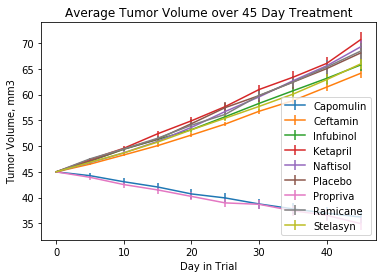

In [6]:
# Generate the Plot (with Error Bars)
tumor_plotter = tumor_mean_new.reset_index()
tumor_sem_plotter = tumor_sem_new.reset_index()

time = tumor_plotter["Timepoint"]

Capo_mean  = tumor_plotter["Capomulin"]
Cefta_mean = tumor_plotter["Ceftamin"]
Infub_mean = tumor_plotter["Infubinol"]
Keta_mean  = tumor_plotter["Ketapril"]
Nafti_mean = tumor_plotter["Naftisol"]
Plac_mean  = tumor_plotter["Placebo"]
Rami_mean  = tumor_plotter["Ramicane"]
Stela_mean = tumor_plotter["Stelasyn"]
Zoni_mean  = tumor_plotter["Zoniferol"]

Capo_sem  = tumor_sem_plotter["Capomulin"]
Cefta_sem = tumor_sem_plotter["Ceftamin"]
Infub_sem = tumor_sem_plotter["Infubinol"]
Keta_sem  = tumor_sem_plotter["Ketapril"]
Nafti_sem = tumor_sem_plotter["Naftisol"]
Plac_sem  = tumor_sem_plotter["Placebo"]
Rami_sem  = tumor_sem_plotter["Ramicane"]
Stela_sem = tumor_sem_plotter["Stelasyn"]
Zoni_sem  = tumor_sem_plotter["Zoniferol"]

fig, ax = plt.subplots()
ax.errorbar(time, Capo_mean, yerr = Capo_sem)
ax.errorbar(time, Cefta_mean, yerr = Cefta_sem)
ax.errorbar(time, Infub_mean, yerr = Infub_sem)
ax.errorbar(time, Keta_mean, yerr = Keta_sem)
ax.errorbar(time, Nafti_mean, yerr = Nafti_sem)
ax.errorbar(time, Plac_mean, yerr = Plac_sem)
ax.errorbar(time, Rami_mean, yerr = Rami_sem)
ax.errorbar(time, Stela_mean, yerr = Stela_sem)
ax.errorbar(time, Zoni_mean, yerr = Zoni_sem)

plt.title("Average Tumor Volume over 45 Day Treatment")
plt.xlabel("Day in Trial")
plt.ylabel("Tumor Volume, mm3")
plt.legend(Drug_list, loc = "best")

In [7]:
# Show the Figure
plt.show()

In [8]:
mean_df = combined_pd.groupby("Drug").mean()['Tumor Volume (mm3)']

mean_df.head()


Drug
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.957935
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_df = combined_pd.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
meta_mean = meta_df.groupby(["Drug", "Timepoint"]).mean()
meta_mean
# Convert to DataFrame
meta_mean = meta_mean.reset_index()
# Preview DataFrame
meta_mean = meta_mean.rename(columns = {"Metastatic Sites": "Average # of Sites"})
meta_mean

,Drug,Timepoint,Average # of Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [10]:
meta_sem = meta_df.groupby(["Drug", "Timepoint"]).sem()
meta_sem
# Convert to DataFrame
meta_sem = meta_sem.reset_index()
# Preview DataFrame
meta_sem = meta_sem.rename(columns = {"Metastatic Sites": "Standard Error"})
meta_sem

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [11]:
# ReFormating the Data Frames
meta_mean_new = meta_mean.pivot(index = 'Timepoint', columns = 'Drug', values = "Average # of Sites")
meta_mean_new
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Minor Data Munging to Re-Format the Data Frames
meta_sem_new = meta_sem.pivot(index = 'Timepoint', columns = 'Drug', values = 'Standard Error')
meta_sem_new
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


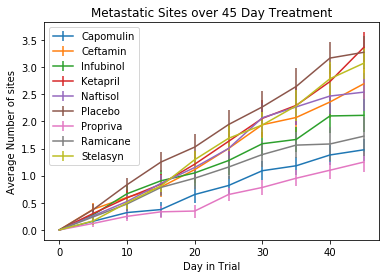

In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

# Generate the Plot (with Error Bars)
meta_plotter = meta_mean_new.reset_index()
meta_sem_plotter = meta_sem_new.reset_index()

time = meta_plotter["Timepoint"]

Capo_meta_mean  = meta_plotter["Capomulin"]
Cefta_meta_mean = meta_plotter["Ceftamin"]
Infub_meta_mean = meta_plotter["Infubinol"]
Keta_meta_mean  = meta_plotter["Ketapril"]
Nafti_meta_mean = meta_plotter["Naftisol"]
Plac_meta_mean  = meta_plotter["Placebo"]
Rami_meta_mean  = meta_plotter["Ramicane"]
Stela_meta_mean = meta_plotter["Stelasyn"]
Zoni_meta_mean  = meta_plotter["Zoniferol"]

Capo_meta_sem  = meta_sem_plotter["Capomulin"]
Cefta_meta_sem = meta_sem_plotter["Ceftamin"]
Infub_meta_sem = meta_sem_plotter["Infubinol"]
Keta_meta_sem  = meta_sem_plotter["Ketapril"]
Nafti_meta_sem = meta_sem_plotter["Naftisol"]
Plac_meta_sem  = meta_sem_plotter["Placebo"]
Rami_meta_sem  = meta_sem_plotter["Ramicane"]
Stela_meta_sem = meta_sem_plotter["Stelasyn"]
Zoni_meta_sem  = meta_sem_plotter["Zoniferol"]

fig, ax = plt.subplots()
ax.errorbar(time, Capo_meta_mean, yerr = Capo_meta_sem)
ax.errorbar(time, Cefta_meta_mean, yerr = Cefta_meta_sem)
ax.errorbar(time, Infub_meta_mean, yerr = Infub_meta_sem)
ax.errorbar(time, Keta_meta_mean, yerr = Keta_meta_sem)
ax.errorbar(time, Nafti_meta_mean, yerr = Nafti_meta_sem)
ax.errorbar(time, Plac_meta_mean, yerr = Plac_meta_sem)
ax.errorbar(time, Rami_meta_mean, yerr = Rami_meta_sem)
ax.errorbar(time, Stela_meta_mean, yerr = Stela_meta_sem)
ax.errorbar(time, Zoni_meta_mean, yerr = Zoni_meta_sem)

plt.title("Metastatic Sites over 45 Day Treatment")
plt.xlabel("Day in Trial")
plt.ylabel("Average Number of sites")
plt.legend(Drug_list, loc = "best")

In [14]:

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survive_pd = combined_pd.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]
mouse_count = survive_pd.groupby(["Drug", "Timepoint"]).count()
mouse_count = mouse_count.reset_index()
mouse_count = mouse_count.rename(columns = {"Tumor Volume (mm3)": "Mouse Count"})
mouse_count


# Preview DataFrame

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [15]:
#ReFormating the Data Frames
mouse_count_new = mouse_count.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
mouse_count_new
# Preview the Data Frame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


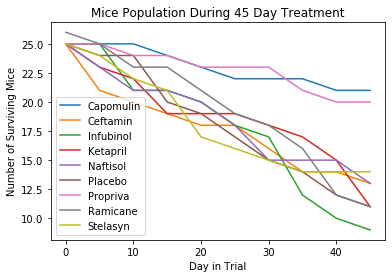

In [16]:
# Generate the Plot (Looking for percentages)
mouse_plotter = mouse_count_new.reset_index()

time = mouse_plotter["Timepoint"]

Capo_mouse  = mouse_plotter["Capomulin"]
Cefta_mouse = mouse_plotter["Ceftamin"]
Infub_mouse = mouse_plotter["Infubinol"]
Keta_mouse  = mouse_plotter["Ketapril"]
Nafti_mouse = mouse_plotter["Naftisol"]
Plac_mouse  = mouse_plotter["Placebo"]
Rami_mouse  = mouse_plotter["Ramicane"]
Stela_mouse = mouse_plotter["Stelasyn"]
Zoni_mouse  = mouse_plotter["Zoniferol"]


fig, ax = plt.subplots()
ax.errorbar(time, Capo_mouse)
ax.errorbar(time, Cefta_mouse)
ax.errorbar(time, Infub_mouse)
ax.errorbar(time, Keta_mouse)
ax.errorbar(time, Nafti_mouse)
ax.errorbar(time, Plac_mouse)
ax.errorbar(time, Rami_mouse)
ax.errorbar(time, Stela_mouse)
ax.errorbar(time, Zoni_mouse)

plt.title("Mice Population During 45 Day Treatment")
plt.xlabel("Day in Trial")
plt.ylabel("Number of Surviving Mice")
plt.legend(Drug_list, loc = "best")
# Show the Figure
plt.show()

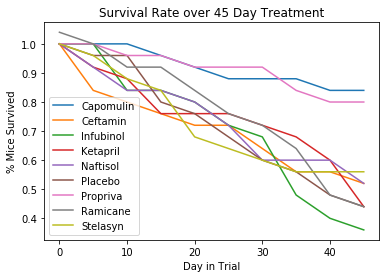

In [17]:
mouse_count["Mouse Count"] = mouse_count["Mouse Count"]/25
mouse_count_new2 = mouse_count.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
mouse_count_new2
# Generate the Plot (Looking for percentages)
mouse_plotter2 = mouse_count_new2.reset_index()

time = mouse_plotter2["Timepoint"]

Capo_mouse  = mouse_plotter2["Capomulin"]
Cefta_mouse = mouse_plotter2["Ceftamin"]
Infub_mouse = mouse_plotter2["Infubinol"]
Keta_mouse  = mouse_plotter2["Ketapril"]
Nafti_mouse = mouse_plotter2["Naftisol"]
Plac_mouse  = mouse_plotter2["Placebo"]
Rami_mouse  = mouse_plotter2["Ramicane"]
Stela_mouse = mouse_plotter2["Stelasyn"]
Zoni_mouse  = mouse_plotter2["Zoniferol"]
# Save the Figure

fig, ax = plt.subplots()
ax.errorbar(time, Capo_mouse)
ax.errorbar(time, Cefta_mouse)
ax.errorbar(time, Infub_mouse)
ax.errorbar(time, Keta_mouse)
ax.errorbar(time, Nafti_mouse)
ax.errorbar(time, Plac_mouse)
ax.errorbar(time, Rami_mouse)
ax.errorbar(time, Stela_mouse)
ax.errorbar(time, Zoni_mouse)

plt.title("Survival Rate over 45 Day Treatment")
plt.xlabel("Day in Trial")
plt.ylabel("% Mice Survived")
plt.legend(Drug_list, loc = "best")
# Show the Figure
plt.show()

In [18]:
# Calculate the percent changes for each drug
tumor_columns = list(tumor_mean_new)
tumor_vol_change = []

for i in tumor_columns:
    tumor_vol_change.append((tumor_mean_new[i][45]-tumor_mean_new[i][0])/tumor_mean_new[i][0])
    
vol_change_pd = pd.DataFrame({"Drug":tumor_columns, "Pct. Change":tumor_vol_change})
vol_change_pd

# Display the data to confirm

,Drug,Pct. Change
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Ketapril,0.570288
4,Naftisol,0.539233
5,Placebo,0.512980
6,Propriva,0.472412
7,Ramicane,-0.223209
8,Stelasyn,0.520851
9,Zoniferol,0.465798


## Quartiles, outliers and boxplots

In [19]:
# Store all Relevant Percent Changes into a Tuple
tupler = vol_change_pd[["Drug", "Pct. Change"]]

tuples = [tuple (x) for x in tupler.values]

tuples

[('Capomulin', -0.19475302667894173),
 ('Ceftamin', 0.4251649185589744),
 ('Infubinol', 0.4612347172785187),
 ('Ketapril', 0.5702879468660608),
 ('Naftisol', 0.5392334713476923),
 ('Placebo', 0.5129796048315153),
 ('Propriva', 0.4724117486320637),
 ('Ramicane', -0.22320900462766674),
 ('Stelasyn', 0.5208513428789903),
 ('Zoniferol', 0.4657975086509525)]

        Drug  Pct. Change
0  Capomulin    -0.194753
1   Ramicane    -0.223209
        Drug  Pct. Change
0   Ceftamin     0.425165
1  Infubinol     0.461235
2   Ketapril     0.570288
3   Naftisol     0.539233
4    Placebo     0.512980
5   Propriva     0.472412
6   Stelasyn     0.520851
7  Zoniferol     0.465798


<BarContainer object of 8 artists>

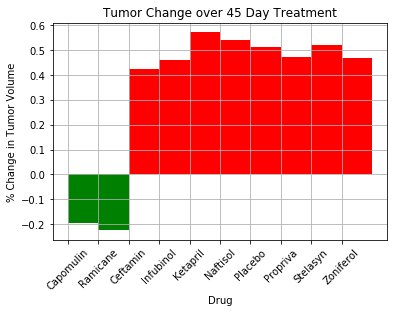

In [20]:
# Splice the data between passing and failing drugs
tumor_drug_pass = []
tumor_drug_fail = []
for tuple in tuples:
    if tuple[1] < 0:
        tumor_drug_pass.append(tuple)
    else:
        tumor_drug_fail.append(tuple)
good_drug = pd.DataFrame(tumor_drug_pass, columns=['Drug', 'Pct. Change'])
bad_drug = pd.DataFrame(tumor_drug_fail, columns = ['Drug', 'Pct. Change'])

        
# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Change in Tumor Volume")

x_axis = np.arange(len(tumor_mean_new))
plt.xticks(x_axis, rotation = 45)
plt.grid()
# Use functions to label the percentages of changes
pct = lambda x: '{:,.2%}'.format(x)

good_drug['Pct. Change'].apply(pct)
bad_drug["Pct. Change"].apply(pct)

print(good_drug)
print(bad_drug)

plt.bar(good_drug["Drug"], good_drug["Pct. Change"], width = 1, color = 'green', align = 'edge')
plt.bar(bad_drug["Drug"], bad_drug["Pct. Change"], width = 1, color = 'red', align = 'edge')

# Save the Figure


# Show the Figure
##fig.show()